# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [37]:
df = pd.read_csv('../weather_dataset.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [39]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [40]:
numeric_columns = df.select_dtypes(include='number')

numeric_columns

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


In [41]:
categorical_columns = df.select_dtypes(include='object')

categorical_columns

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
...,...,...,...,...
13195,overcast,Summer,mountain,Rainy
13196,cloudy,Winter,coastal,Snowy
13197,overcast,Autumn,coastal,Cloudy
13198,overcast,Winter,inland,Snowy


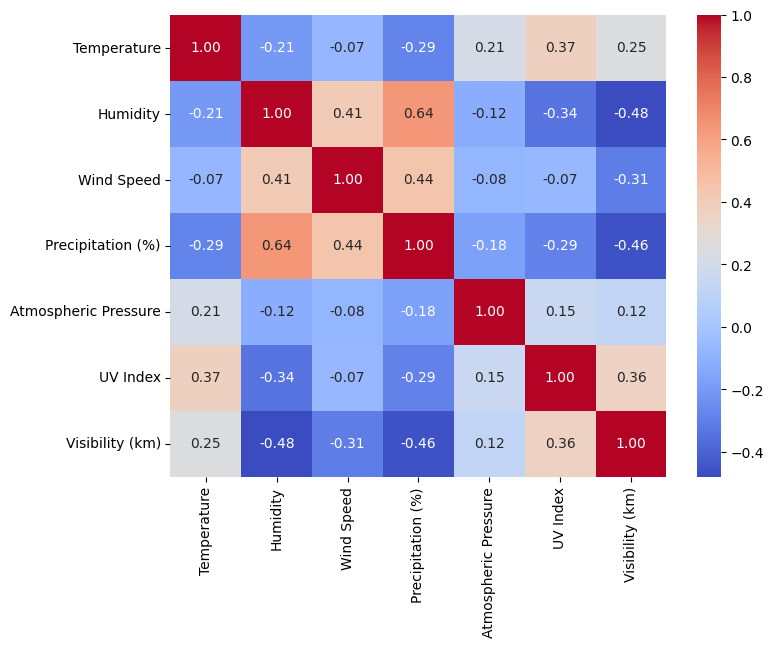

In [42]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

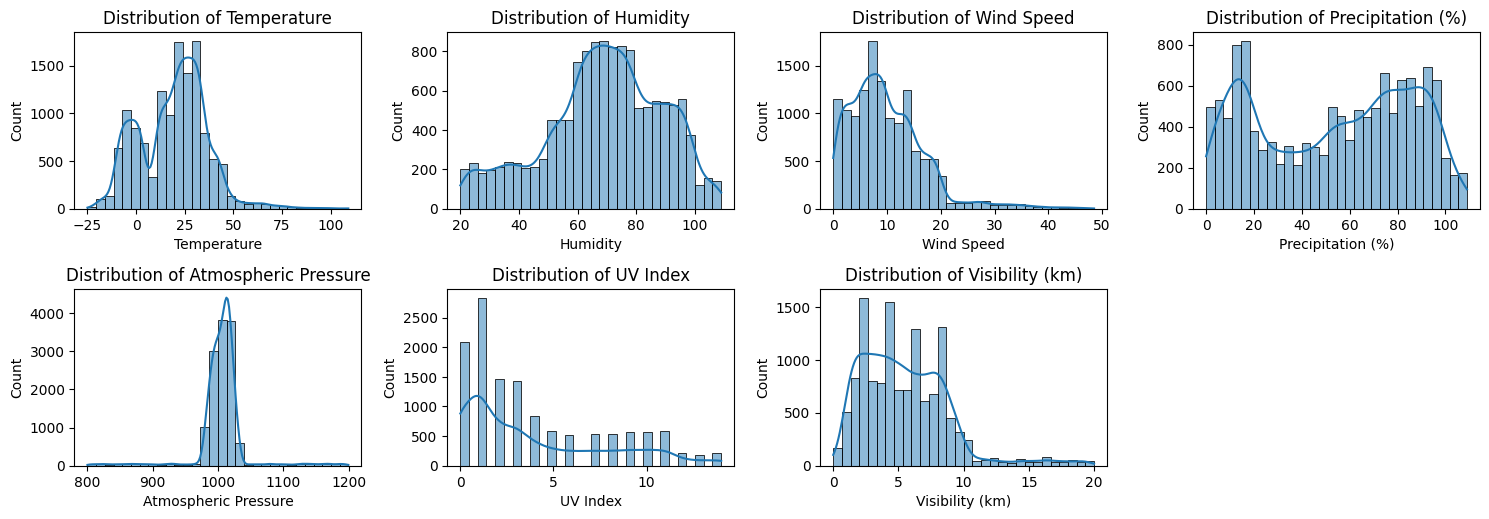

In [43]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numeric_columns[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

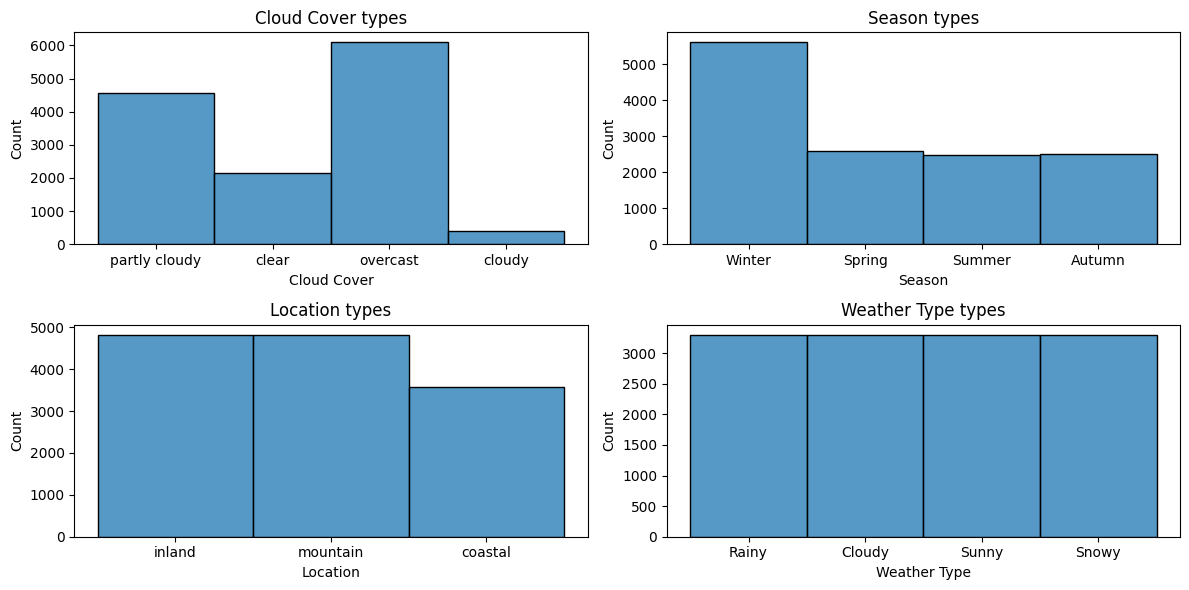

In [44]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(categorical_columns, x=column)
    plt.title(f'{column} types')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [45]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(0)

### Mengatasi Outlier

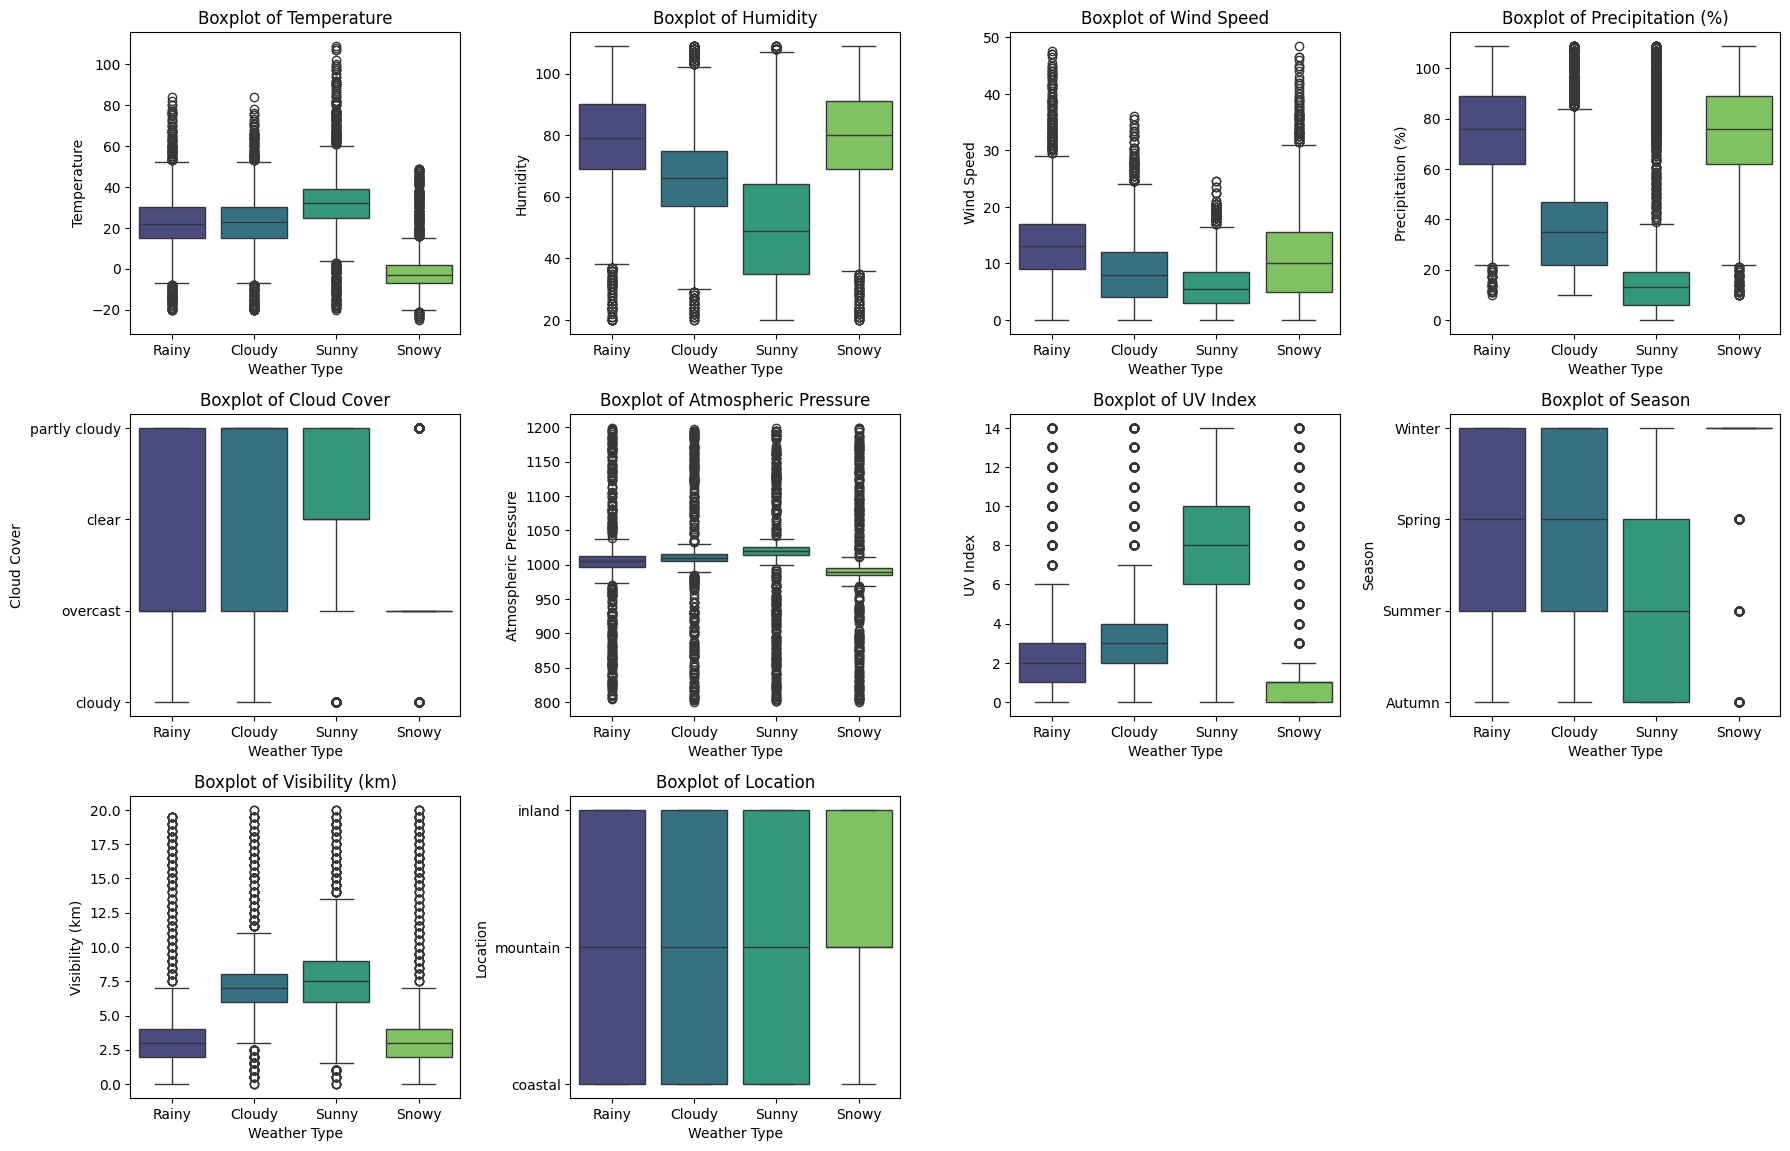

In [47]:
plt.figure(figsize=(18, 15))

for i, column in enumerate(df, 1):
    if column != 'Weather Type':
        plt.subplot(4, 4, i)
        sns.boxplot(x='Weather Type', y=column, data=df, hue='Weather Type', palette='viridis')
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [48]:
numeric_features = numeric_columns.columns
categorical_features = categorical_columns.columns

In [49]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features] 

df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

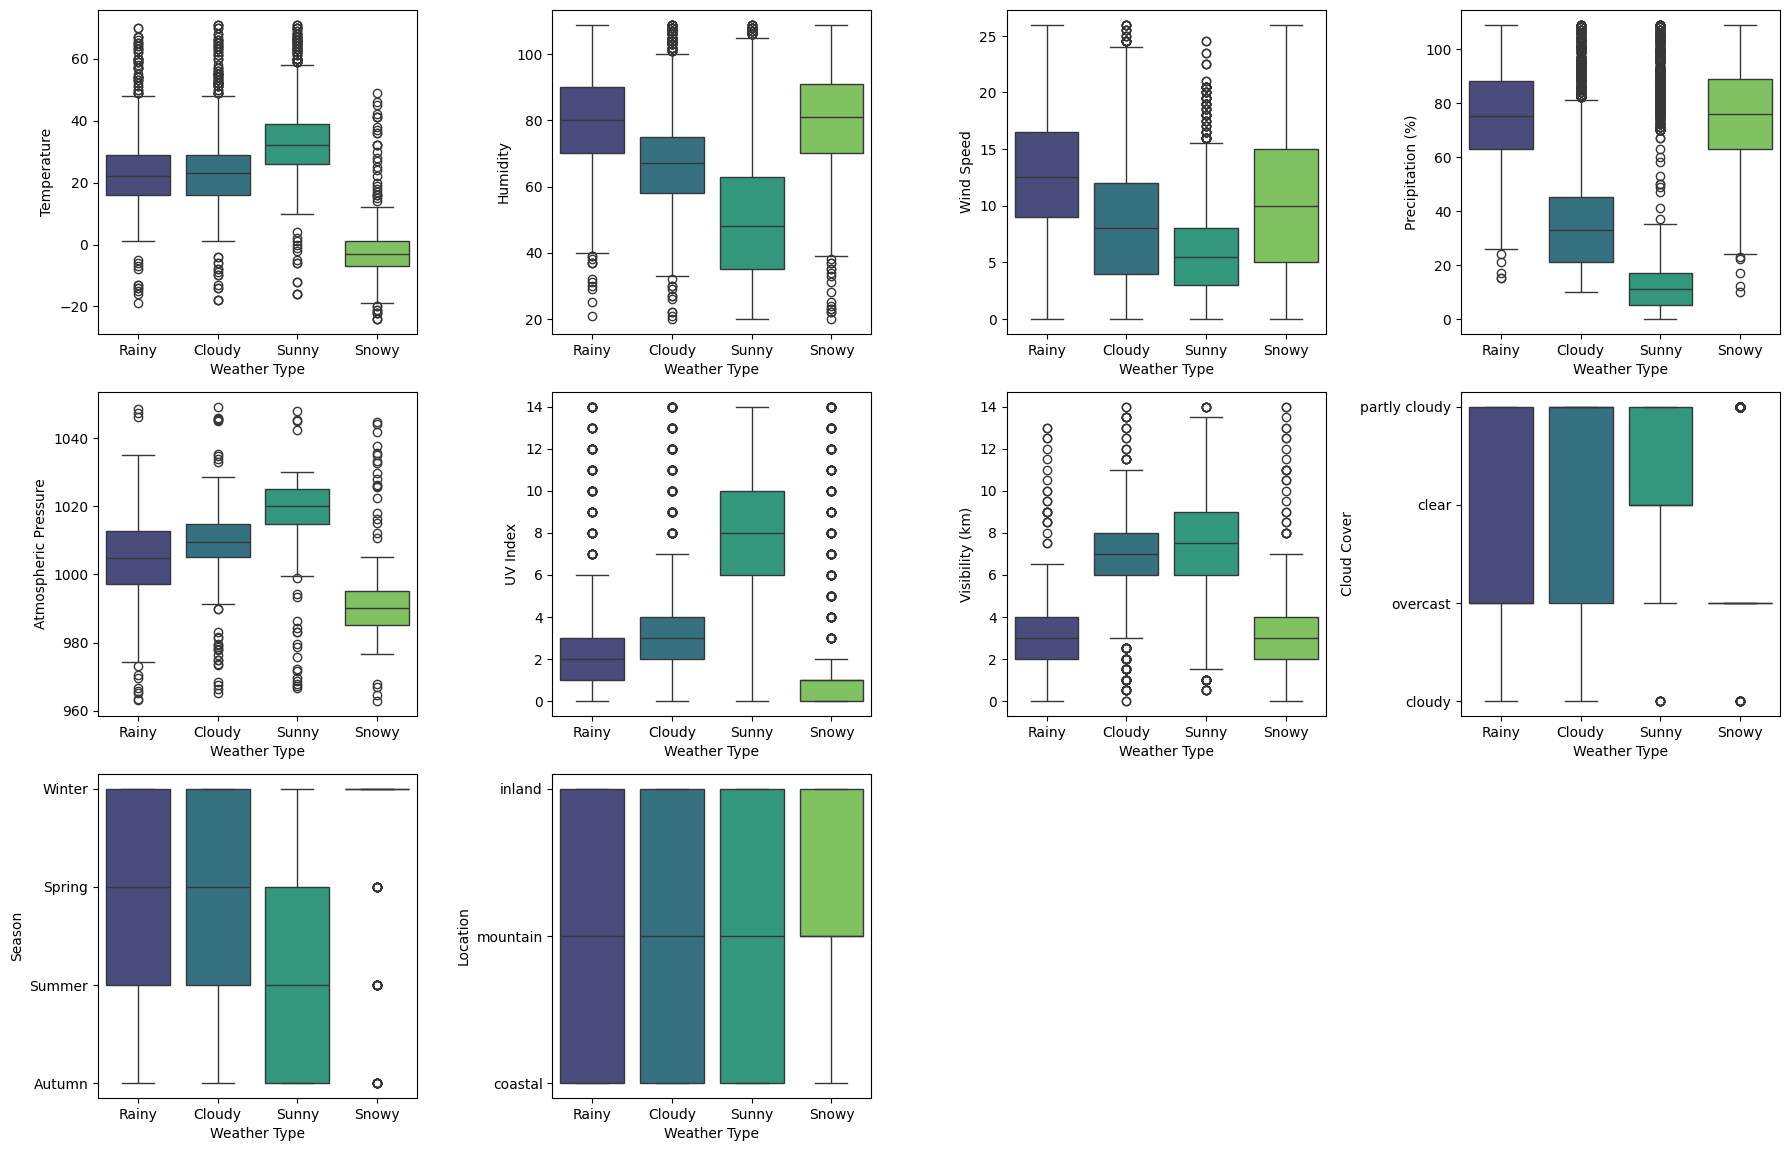

In [50]:
plt.figure(figsize=(18, 15))

for i, column in enumerate(df, 1):
    if column != 'Weather Type':
        plt.subplot(4, 4, i)
        sns.boxplot(x='Weather Type', y=column, data=df, hue='Weather Type', palette='viridis')

plt.tight_layout()
plt.show()

### Normalization

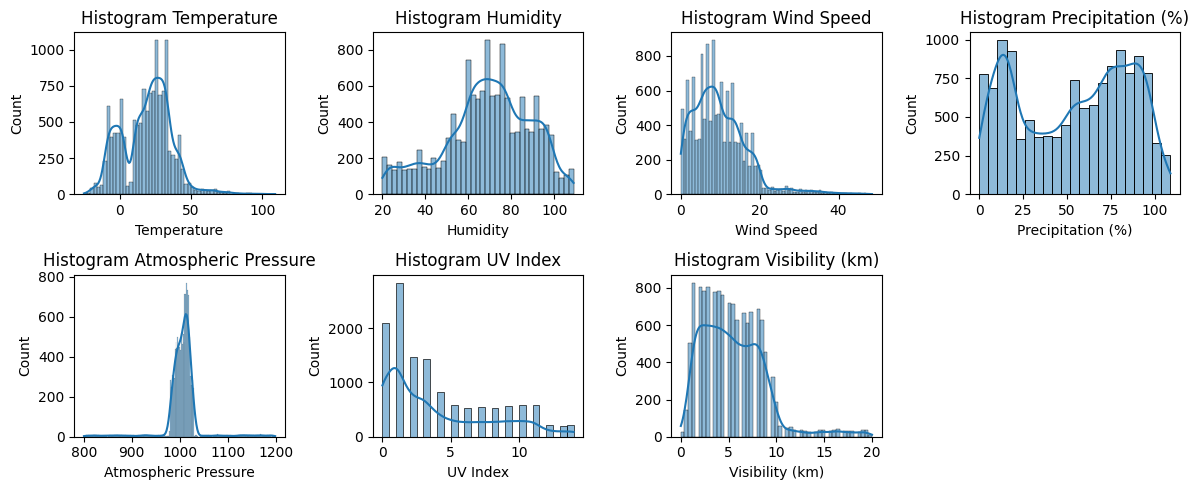

In [51]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

plt.figure(figsize=(12,5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(numeric_columns[column], kde=True)
    plt.title(f"Histogram {column}")

plt.tight_layout()
plt.show()

### Label Encoding

In [52]:
le = LabelEncoder()



for col in categorical_features:
    df[col] = le.fit_transform(df[col])
    
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type
0,-0.319956,0.180018,0.050410,0.935683,0.352182,-0.448083,-0.616594,3,3,1,1
1,1.250401,1.364687,-0.127689,0.592525,0.399333,0.940475,1.878101,3,1,1,0
2,0.685072,-0.283548,-0.394836,-1.123266,0.962832,0.385052,0.151005,0,1,2,3
3,1.187586,0.695092,-1.374378,0.935683,1.544883,0.940475,-1.576092,0,1,0,3
4,0.496630,0.231525,1.386148,0.436544,-1.205363,-0.725794,-1.000393,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13194,0.622258,-0.386563,0.673754,-1.092070,-0.266971,-0.448083,-0.040895,2,1,0,0
13195,-0.571213,0.231525,0.940902,0.592525,-0.240690,-0.725794,-1.576092,2,2,2,1
13197,0.685072,0.386047,-0.661984,-0.748912,0.496728,-0.170371,1.494302,2,0,0,0
13198,-1.010912,0.334540,0.139459,1.310038,-1.700068,-1.003506,-1.192293,2,3,1,2


In [53]:
df = df.rename(columns={'Weather Type': 'Target'})

df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Target
0,-0.319956,0.180018,0.050410,0.935683,0.352182,-0.448083,-0.616594,3,3,1,1
1,1.250401,1.364687,-0.127689,0.592525,0.399333,0.940475,1.878101,3,1,1,0
2,0.685072,-0.283548,-0.394836,-1.123266,0.962832,0.385052,0.151005,0,1,2,3
3,1.187586,0.695092,-1.374378,0.935683,1.544883,0.940475,-1.576092,0,1,0,3
4,0.496630,0.231525,1.386148,0.436544,-1.205363,-0.725794,-1.000393,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13194,0.622258,-0.386563,0.673754,-1.092070,-0.266971,-0.448083,-0.040895,2,1,0,0
13195,-0.571213,0.231525,0.940902,0.592525,-0.240690,-0.725794,-1.576092,2,2,2,1
13197,0.685072,0.386047,-0.661984,-0.748912,0.496728,-0.170371,1.494302,2,0,0,0
13198,-1.010912,0.334540,0.139459,1.310038,-1.700068,-1.003506,-1.192293,2,3,1,2
